# Episode 1: Visualizing Data

First step in all data anaytics: Look at your data.

$$ X = [ x_1, \dots, x_n ] $$

## Rugplots

- simplest possible plot
- one-dimensional data
- ignores ordering
- use jitter to show multiplicities

<figure>
<img src="img/example_rugplot.png">
<figcaption>Example Rugplot</figcaption>
</figure>

## Histograms

- one-dimensional data only
- ignores ordering
- use area to compare ratios of data
- easier to read than rugplots
- many choices involved

<figure>
<img src="img/example_histogram.png">
<figcaption>Example Histogram</figcaption>
</figure>

We will talk more about histograms in the next episode.

## Scatterplots

- two dimensional data $x_i,y_i$.
- ignores ordering
- two-dimensional variant of rugplot
- show dependency between the two axes

<figure>
<img src="img/example_scatterplot_1.png" width="45%" style="float:left">
<img src="img/example_scatterplot_2.png" width="45%">
<figcaption>Example Scatterplot</figcaption>
</figure>

## Line-Plots

- special case of scatter plot
- interpolation lines add the illusion of continuity
- widely used in parctice

<figure>
<img src="img/example_lineplot.png">
<figcaption>Example Line Plot
</figcaption>
</figure>

# Relations between basic plot types

* Lineplots are a special case of scatterplots
* Scatterplot has marginal rugplots
* Lineplot has marginal y-rugplot
* Histograms show the same information as rugplots

# Creating Plots with the IPython toolchain

- Choice of tools is non essential
- Equivalent functionality can be provided by e.g. Excel, MATLAB or R
- Your monitoring tool should provide much functionality already
- This is not a introduction to python or the libraries

## IPython notebook

- http://ipython.org/notebook.html
- Cell based UI for python like Mathematica
- Decent code editing environment (Completion, Inline doc-strings, output formatting)
- Decent word-editor (Markdown, HTML, Mathjax)
- Mix in shell scripts
- Share notebooks on http://nb.bianp.net/sort/views/
- GitHub renders notebooks natively

This presentation is made with IPython Notebook:
https://github.com/HeinrichHartmann/Statistics-for-Engineers

## Essential Python Libraries

In [3]:
import numpy as np
# http://www.numpy.org/
# provides:
# - np.array() --  high performance array implementation
# - np.loadtxt() -- method to read in CSV files

from matplotlib import pyplot as plt
# http://matplotlib.org/
# provides:
# - plotting primitives: figures, axes, plygons
# - advanced plotting methods for eg. histograms, scatterplots
# - pyplot is a MATLAB like API to matplotlib

import seaborn as sns
# http://stanford.edu/~mwaskom/software/seaborn/
# like matplotlib, but:
# - focus on statistical data visualization
# - pretty colors

In [23]:
# Configure Notebooks graphic output
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,5)
np.set_printoptions(precision=2)

In [8]:
## Importing Data

# - A number of example datasets is provided in "DataSets/" folder
# - Look into one of them
# - use csvkit (http://csvkit.readthedocs.org/) for formatted output

!csvlook "DataSets/RequestRates.csv" -H | head

# - In this case the schema is <timestamp>,<value>

|-------------+-------------------|
|  column1    | column2           |
|-------------+-------------------|
|  1430272800 | 789.739501953125  |
|  1430276400 | 778.480285644531  |
|  1430280000 | 820.662231445312  |
|  1430283600 | 951.75146484375   |
|  1430287200 | 1142.41357421875  |
|  1430290800 | 1340.40576171875  |
|  1430294400 | 1485.84899902344  |


In [55]:
# Read csv file with np.loadtxt()
# get help with `np.loadtxt?`

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print X[:5], "..."

[  789.74   778.48   820.66   951.75  1142.41] ...


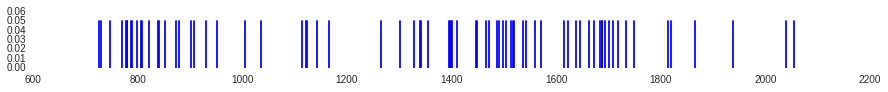

In [56]:
## Creating Ruplots

plt.figure(figsize=(15,1)) # Use smaller image canvas

# Seaborn provides a built-in method for Rugplots
# semi-colon ';' suppresses text output
# for some resason the default color
sns.rugplot(X, color="blue"); 

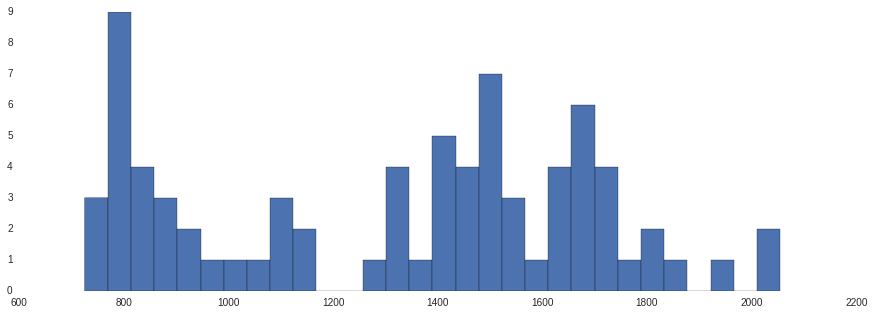

In [57]:
## Creating Histograms

# Matplotlib provides a built-in method
plt.hist(X, bins=30);

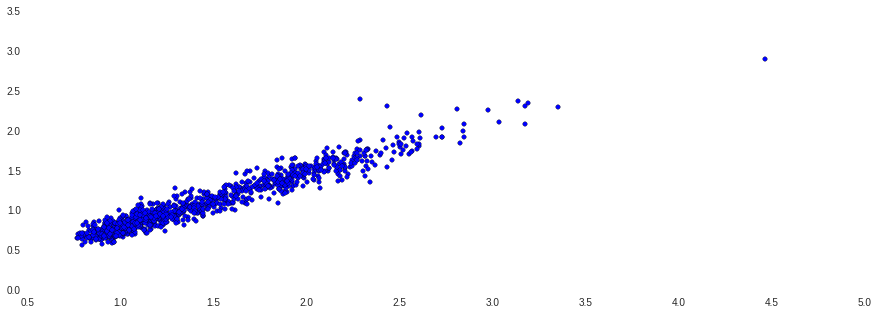

In [66]:
## Creating Scatterplots

# load two-dimensional datasets
table = np.loadtxt("DataSets/ReqMultiNode.csv", delimiter=',', usecols=(0,1,2))[:1000]

T = table[:,0] # time stamps
A = table[:,1] # node A-requests
B = table[:,2] # node B-requests

plt.scatter(A,B);

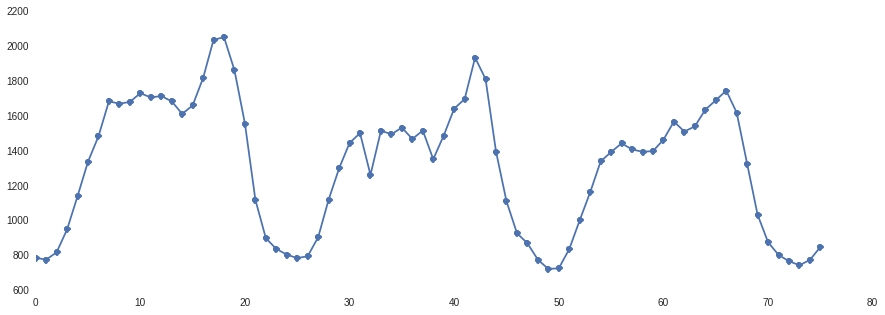

In [48]:
## Creating LinePlots

# Matplotlib provides a built-in method
# use style 'o-' to show datapoints (o) and line (-)
plt.plot(X,'o-');

# Examples from production data

- CPU usage single system
- request rates
- IO - OPS for db cluster